<a href="https://colab.research.google.com/github/wahyupratama18/PCVK_Genap_2022/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import io
import math
import os
import glob
from PIL import Image

<BarContainer object of 256 artists>

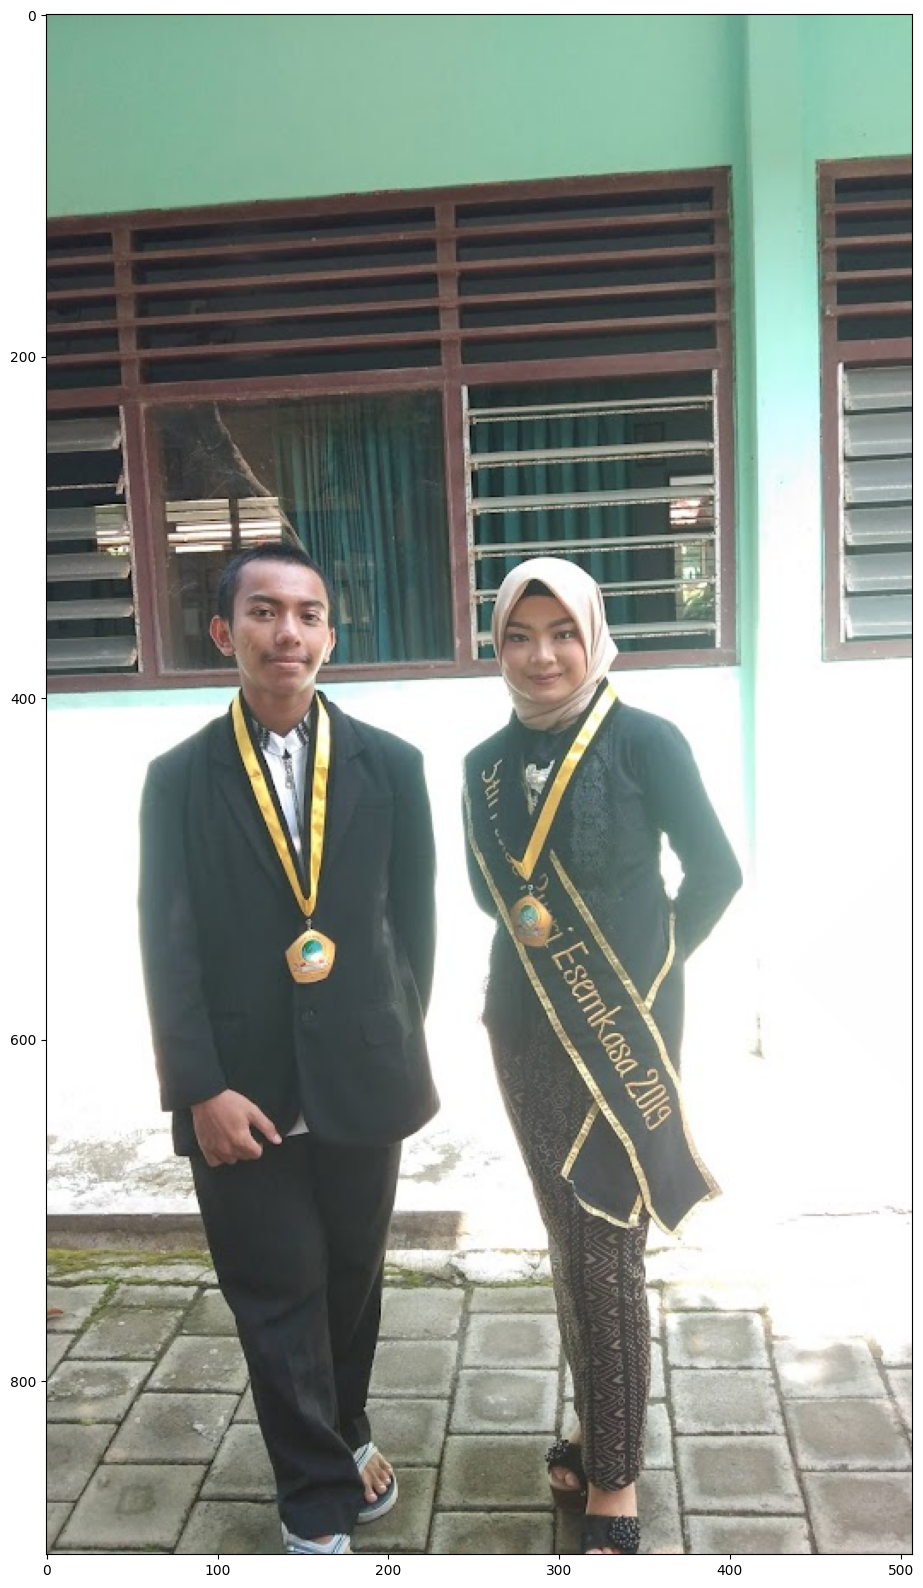

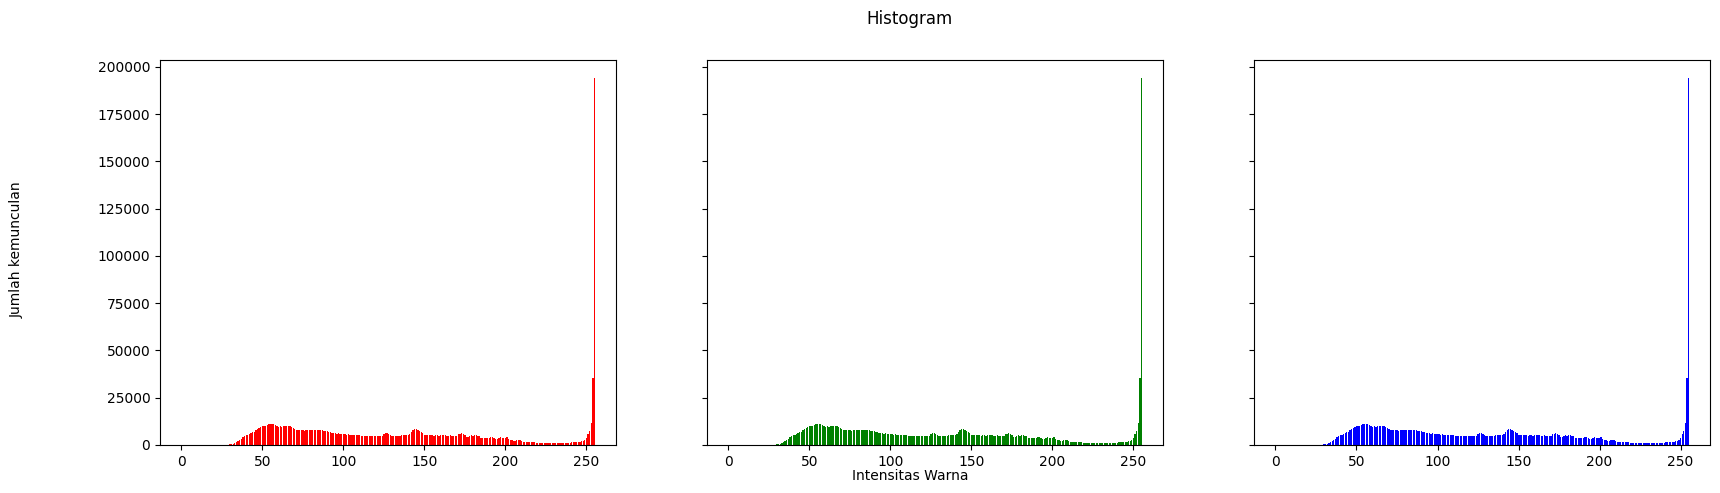

In [38]:
img = cv.imread('/content/drive/MyDrive/Classroom/PCVK/Rika.jpg')
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(rgb)

h, w, depth = np.shape(img)
names = np.arange(256)

blue = green = red = [0] * 256

for y in range(0, h):
  for x in range(0, w):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

fig, ax = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram')
fig.text(.05, .5, 'Jumlah kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
ax[0].bar(names, red, color='red')
ax[1].bar(names, green, color='green')
ax[2].bar(names, blue, color='blue')

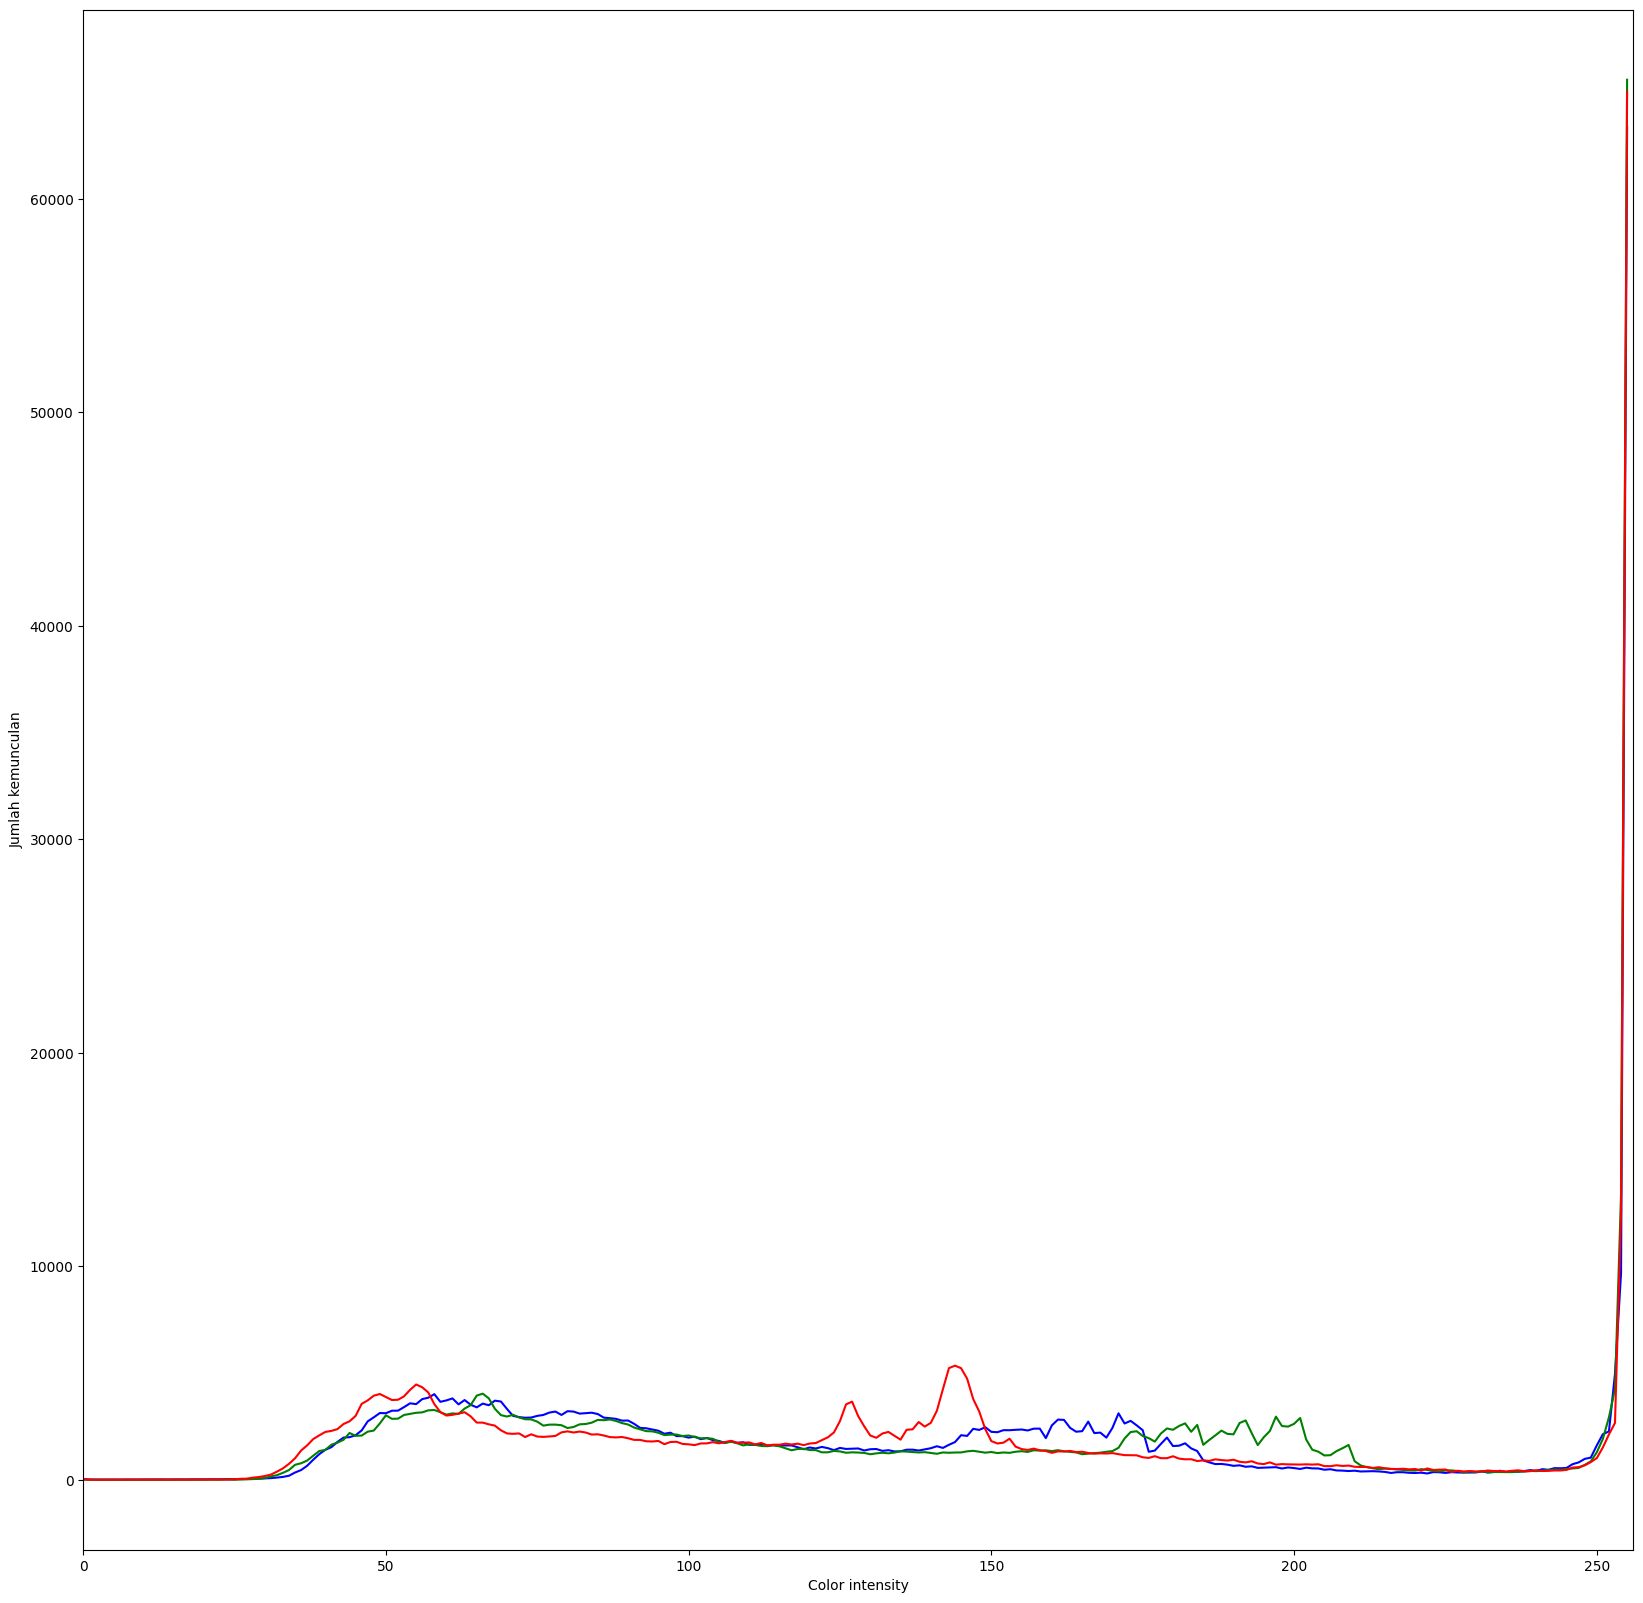

In [39]:
# use numpy histogram
colors = ('b', 'g', 'r')
channels = (0, 1, 2)

plt.xlim([0, 256])
for channel, c in zip(channels, colors):
  histogram, bin = np.histogram(img[:,:, channel], bins=256, range=(0,256))
  plt.plot(bin[0:-1], histogram, color=c)

plt.xlabel('Color intensity')
plt.ylabel('Jumlah kemunculan')
plt.show()

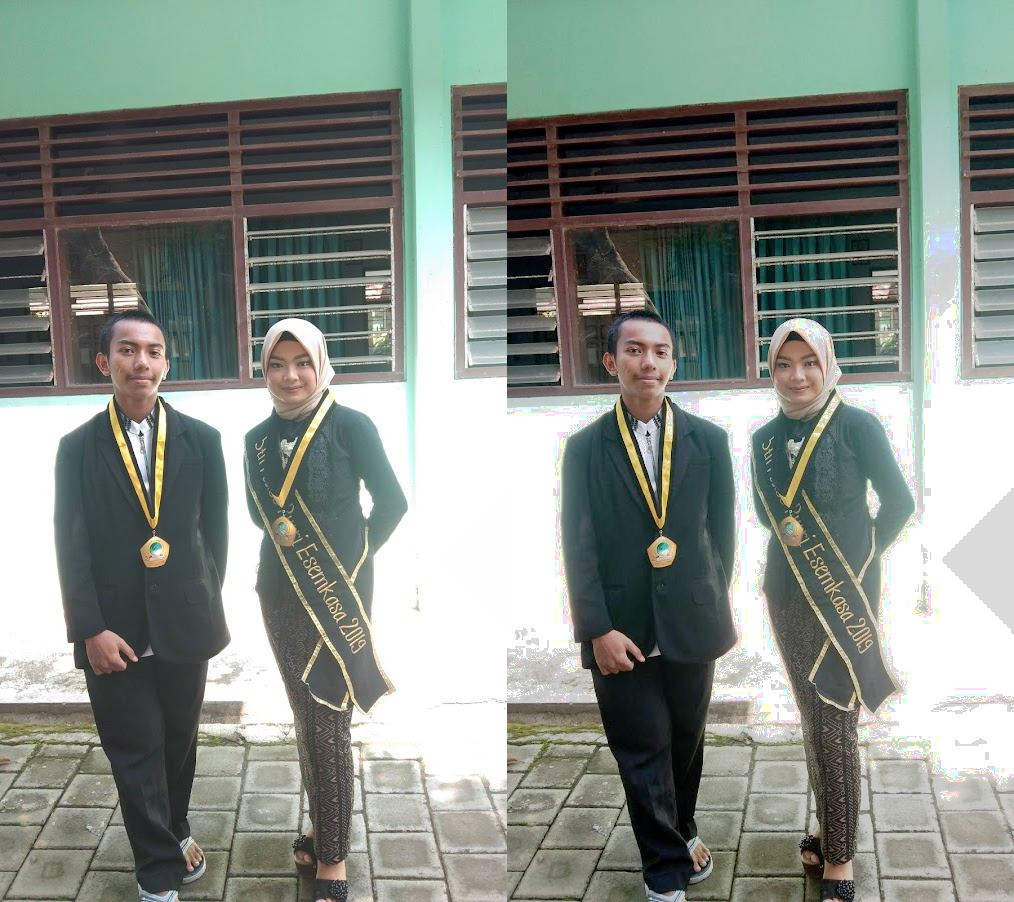

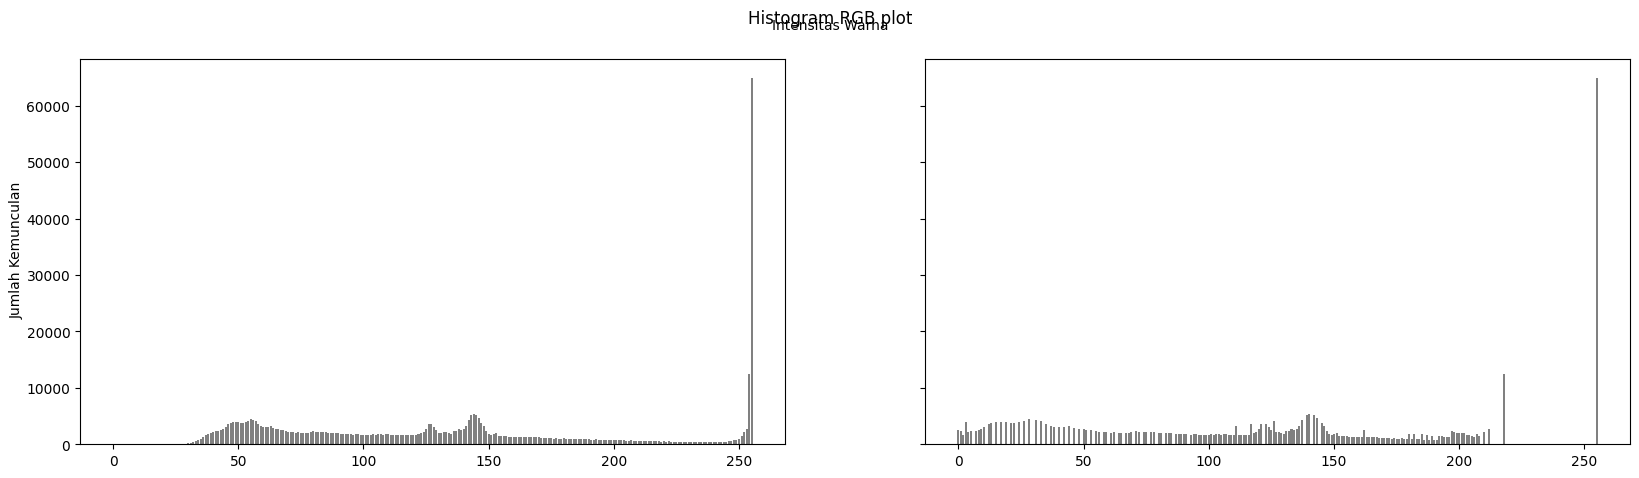

In [40]:
def grams(img):
  h, w, depth = np.shape(img)
  ax = np.zeros((3, 256))
  
  for y in range(0, h):
    for x in range(0, w):
      ax[0][img[y][x][0]] += 1
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1

  return ax

ori = grams(img)

array = np.asarray(img)

# normalize flat
histoArr = np.bincount(array.flatten(), minlength=256)

# normalize
pixels = np.sum(histoArr)
histoArr = histoArr/pixels

# cumulative normal
cHistoArr = np.cumsum(histoArr)

# pixel Mapping
transform = np.floor(255 * cHistoArr).astype(np.uint8)

# transform it!
imgList = list(array.flatten())

equalList = [transform[p] for p in imgList]

# reshape
equalArray = np.reshape(np.asarray(equalList), array.shape)
img2 = equalArray

equalHistogram = grams(img2)

final = cv.hconcat((img, img2))
cv2_imshow(final)

names = np.arange(256) 
isGray = np.array_equal(blue, green, red) 

if (isGray == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, ori[2], color='red') 
  axs[0,1].bar(names, ori[1], color='green') 
  axs[0,2].bar(names, ori[0], color='blue') 
  axs[1,0].bar(names, equalHistogram[2], color='red') 
  axs[1,1].bar(names, equalHistogram[1], color='green')
  axs[1,2].bar(names, equalHistogram[0], color='blue') 
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0].bar(names, ori[2], color='gray')
  axs[1].bar(names, equalHistogram[2], color='gray')

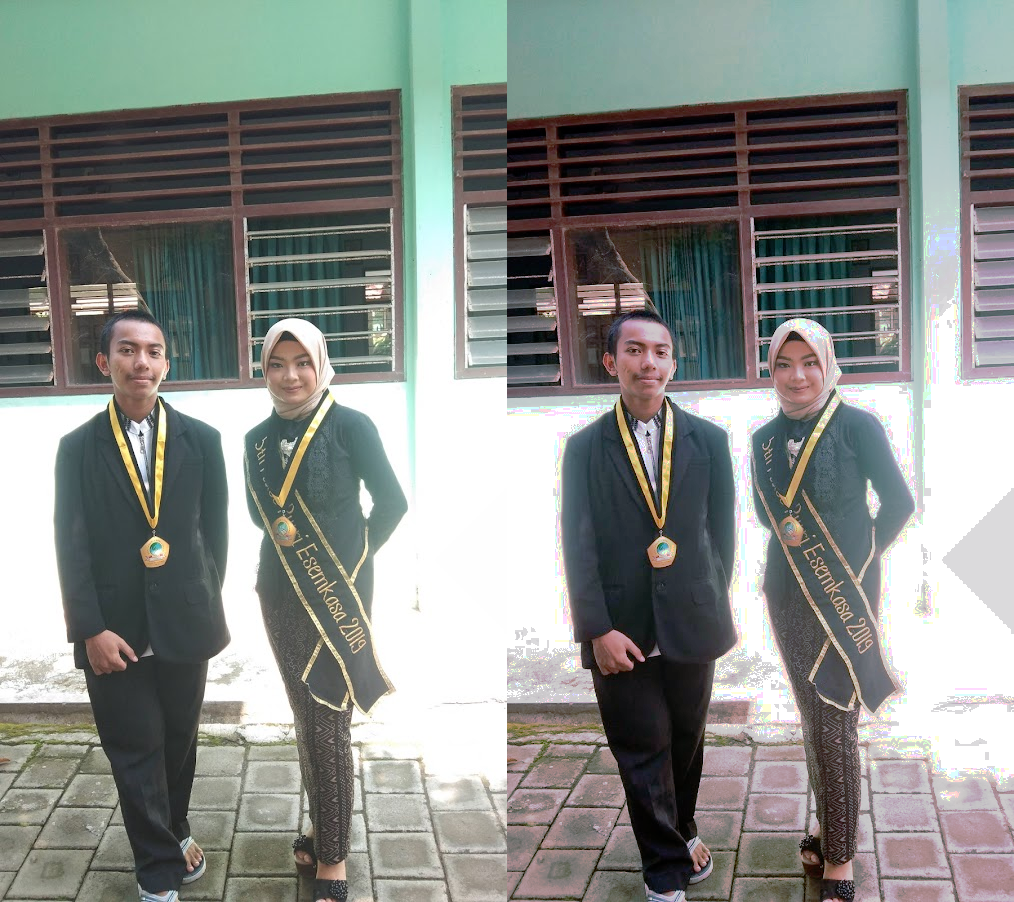

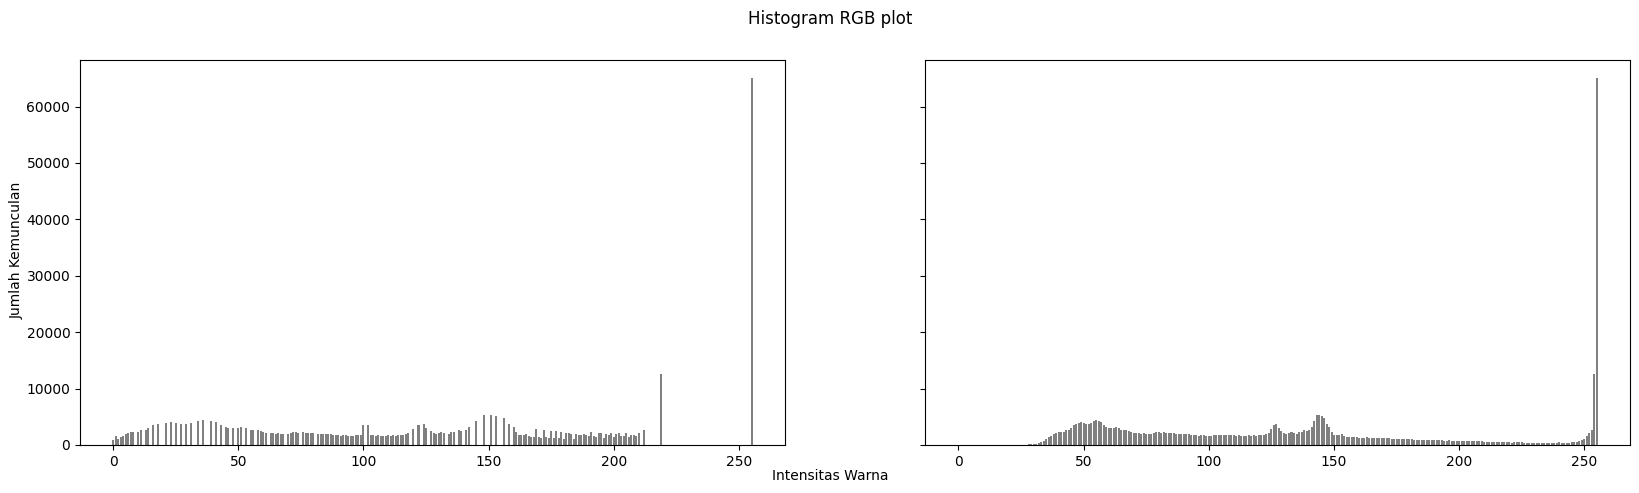

In [41]:
channels = cv.split(img)
eq_channels = []

for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))

equalized = cv.merge(eq_channels)
equaledHistogram = grams(equalized)

final = cv.hconcat((img, equalized))
cv2_imshow(final)

names = np.arange(256)
isGray = np.array_equal(blue, green, red)
if (isGray == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, ori[2], color='red')
  axs[0,1].bar(names, ori[1], color='green')
  axs[0,2].bar(names, ori[0], color='blue')
  axs[1,0].bar(names, equaledHistogram[2], color='red')
  axs[1,1].bar(names, equaledHistogram[1], color='green')
  axs[1,2].bar(names, equaledHistogram[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0].bar(names, equaledHistogram[2], color='gray')
  axs[1].bar(names, ori[2], color='gray')

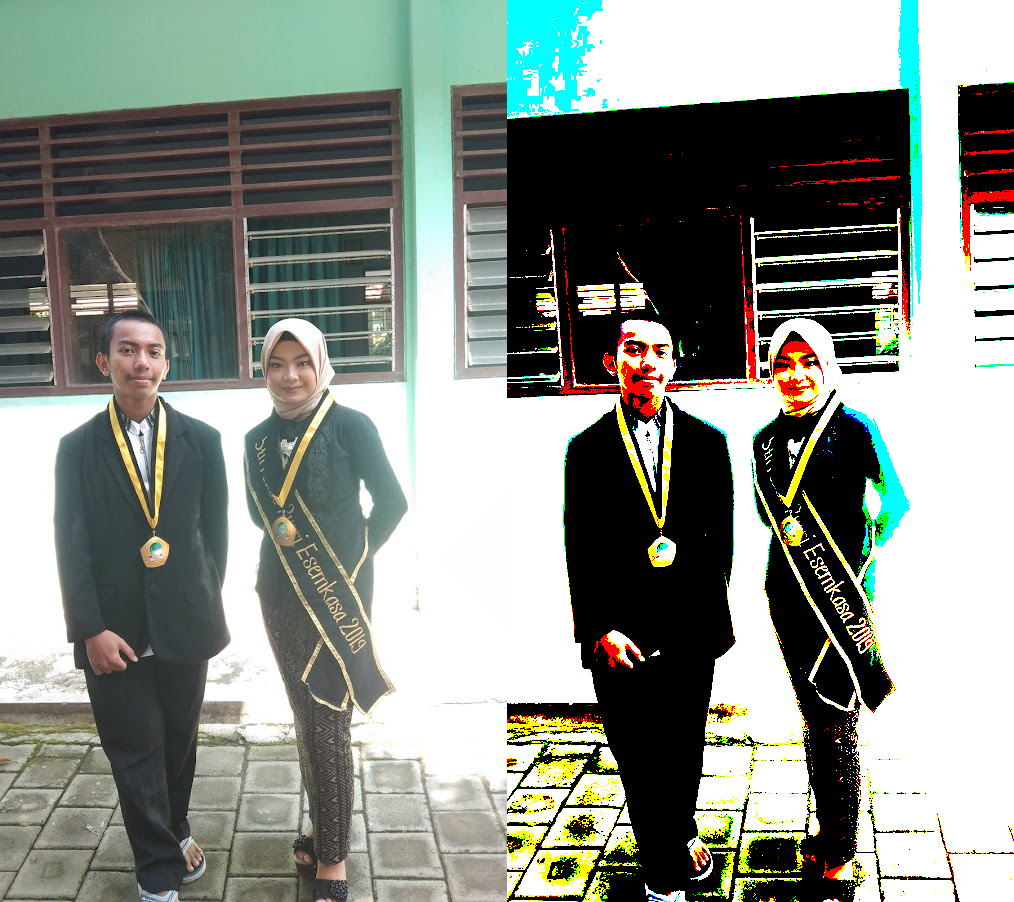

True

In [42]:
palettes = [
  [0, 0, 0],
  [255, 0, 0], 
  [0, 255, 0], 
  [255, 255, 0], 
  [0, 0, 255], 
  [255, 0, 255], 
  [0, 255, 255], 
  [255, 255, 255]
]

def nearestColor(r, g, b):
  pValue = 0
  minDistance = 3 * 255*255 + 1

  for i in range(len(palettes)):
    rDiff = r - palettes[i][0]
    gDiff = g - palettes[i][1]
    bDiff = b - palettes[i][2]

    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i

  return pValue

img16 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img8 = np.zeros(img16.shape, img16.dtype)

for y in range(0, img16.shape[0]):
  for x in range(0, img16.shape[1]):
    baru = nearestColor(img16[y, x, 0], img16[y, x, 1], img16[y, x, 2])
    img8[y, x] = palettes[baru]
    
img16 = cv.cvtColor(img16, cv.COLOR_BGR2RGB)
img8 = cv.cvtColor(img8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img16, img8))
cv2_imshow(final_frame)

cv.imwrite('/content/drive/MyDrive/Classroom/PCVK/Rika-8.png', img8)

In [43]:
image = Image.open('/content/drive/MyDrive/Classroom/PCVK/Rika.jpg')
convert = image.convert(mode='1',dither=Image.FLOYDSTEINBERG)
convert.save('/content/drive/MyDrive/Classroom/PCVK/RikaV2.jpg')

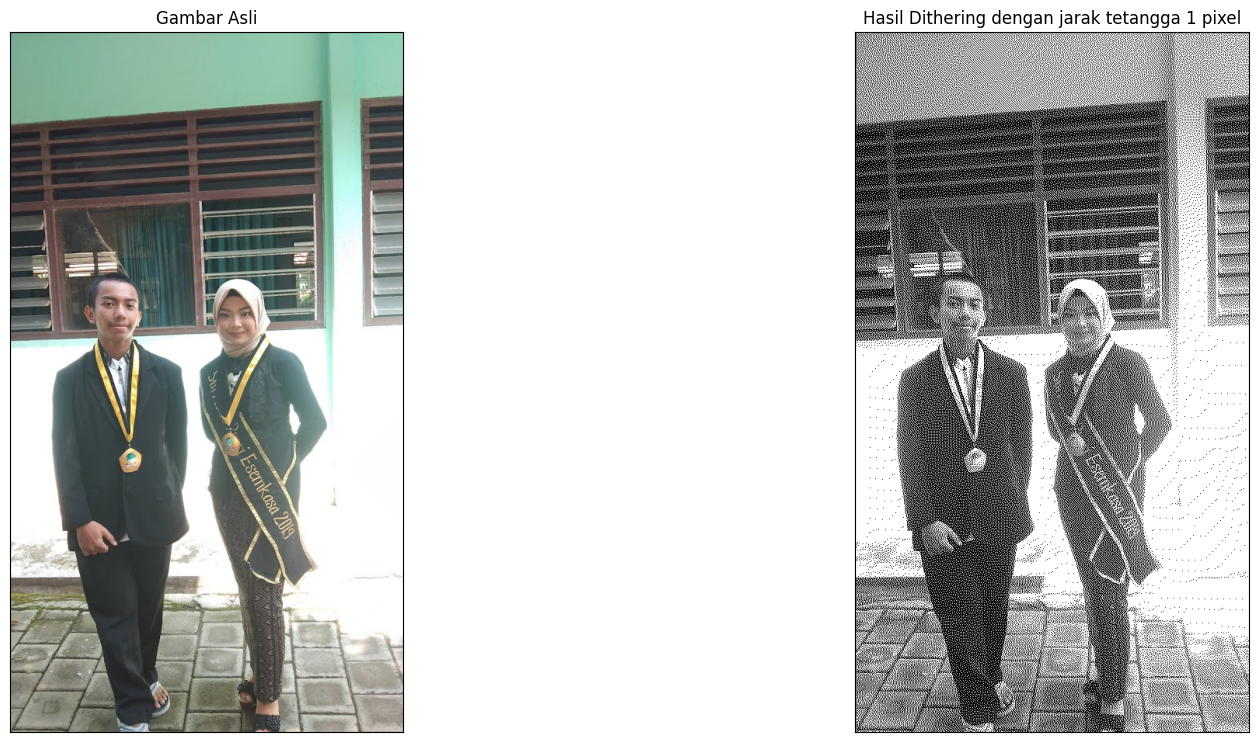

In [44]:
GrayImage = cv.cvtColor(cv.imread('/content/drive/MyDrive/Classroom/PCVK/Rika.jpg'), cv.COLOR_BGR2GRAY)
cv.imwrite('/content/drive/MyDrive/Classroom/PCVK/RikaGray.jpg', GrayImage)

Height = GrayImage.shape[0]
Width = GrayImage.shape[1]

for y in range(0, Height):
    for x in range(0, Width):

        old_value = GrayImage[y, x]
        new_value = 0
        if (old_value > 128) :
            new_value = 255

        GrayImage[y, x] = new_value

        Error = old_value - new_value

        if (x<Width-1):
            NewNumber = GrayImage[y, x+1] + Error * 7 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y, x+1] = NewNumber

        if (x>0 and y<Height-1):
            NewNumber = GrayImage[y+1, x-1] + Error * 3 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x-1] = NewNumber

        if (y<Height-1):
            NewNumber= GrayImage[y+1, x] + Error * 5 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x] = NewNumber

        if (y<Height-1 and x<Width-1):
            NewNumber = GrayImage[y+1, x+1] + Error * 1 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x+1] = NewNumber

cv.imwrite('/content/drive/MyDrive/Classroom/PCVK/RikaGray.jpg', GrayImage)

plt.rcParams["figure.figsize"] = (20,20)

img20 = cv.cvtColor(
  cv.imread('/content/drive/MyDrive/Classroom/PCVK/Rika.jpg'),
  cv.COLOR_BGR2RGB
)
     
# menampilkan hasil filter
plt.subplot(2,2,1)
plt.imshow(img20)
plt.title('Gambar Asli')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(GrayImage, cmap = 'gray')
plt.title('Hasil Dithering dengan jarak tetangga 1 pixel')

plt.xticks([])
plt.yticks([])
plt.show()